# Random Forests (Rastgele Ormanlar)

- Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

- Random Forests temelini oluşturan yöntem bagging yöntemidir.
- Bagging ile Random Subspace yöntemlerinini birleşimi ile oluşmuştur.
- **Ağaçlar** için;
- **Gözlemler, bootstrap( bagging) ratgele örnek seçim yöntemi ile seçilir.**
- **Değişkenler, random subspace yöntemi ile seçilir.**


- Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

- Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçlarının performans değerlendirmesi ve değişken öneminin belilrlenmesi için kullanılır.
- Her düğüm noktasında (yani dallanmanın olduğu yerde) rastgele değişken seçimi yapılır. **(Regresyonda p/3, Sınıflandırmada karekök p), p: değişken sayısı**


- **Topluluk Öğrenme Yöntemleri:**
- Birden fazla algoritmanın ya da birden fazla ağacın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır.

### Bagging(Bootstrap Aggregating);

- Temeli Boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin biraraya getirilerek değerlendirilmesine dayanır.

- Bu çalışma prensibinin kilit noktası bootstrap rastgele örnekleme yöntemidir.
- Bootstrap rastgele örnekleme yöntemi, gözlem birimlerinin içinden yerine koymalı bir şekilde tekrar tekrar örnek çekmek demektir.
- Hata kareler ortamlamasının karekökü (RMSE) değerini düşürür.
- Doğru sınıflandırma oranını arttırır.
- Varyansı düşürür ve ezberlemeye karşı dayanıklıdır

**Gerekli Kütüphaneler** 

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [6]:
# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)

# Veri Seti Hikayesi ve Problemi: Şeker Hastalığı Tahmini

In [7]:
df = pd.read_csv("./diabetes.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Random Forests Model ve Tahmin İşlemleri

In [8]:
y= df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

**Model**

In [9]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [11]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\halil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" fo

**Tahmin**

In [14]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

# Model Tuning (Model Doğrulama)
-  Modelin başarısını değerlendirmek için izlenecek yol Doğruluk oranına (accuracy_score) bakılarak yapılacak. 
- **accuracy_score**' u ne kadar büyük olursa sınıflandırma da o kadar başarılı olduğu anlamına gelir.
- Hiper parametrelerin optimum değerlerine ulaşmak içinde Cross-Validation yöntemini kullanmış olacağız.
- Yani modelleri Train Setiyle eğitirken Cross-Validation yönetemini kullanıp, dışarı bıraktığımız Test Setini ise performansımızı test etmek için kullanacaz.

In [15]:
rf_model = RandomForestClassifier()

In [17]:
rf_params = {"n_estimators": [100,200,500,1000], # kullanılacak olan ağaç sayısı
             "max_features": [3,5,7,8],
             "min_samples_split": [2,5,10,20]}

In [18]:
rf_cv_model = GridSearchCV(rf_model,rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.1min finished


In [21]:
rf_cv_model.best_score_

0.7820405310971349

In [22]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 10, 'n_estimators': 500}

### Final Modeli

In [24]:
rf_tuned = RandomForestClassifier(n_estimators=500,
                                  max_features=5,
                                  min_samples_split=10).fit(X_train,y_train)

In [25]:
y_pred = rf_tuned.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred)

0.7445887445887446

## Değişken Önem Düzeyleri

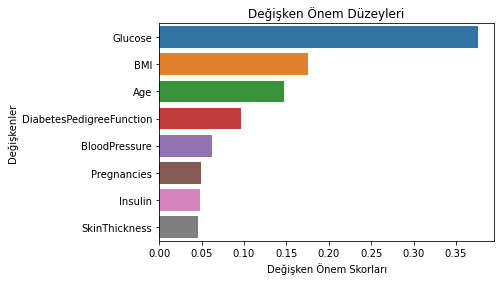

In [29]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.savefig("Değişken Önem Düzeyleri")
plt.show()